#Customer Segmentation using Kmeans

By :

Saniya Jena

National Institute of Technology Delhi

##Information about Columns

1. CustomerID: Unique identifier assigned to each customer.
2. Gender: Categorical feature representing the gender of the customer (e.g., Male/Female).
3. Age: Integer value indicating the age of the customer.
4. Annual Income (k$): Customer's yearly income in thousands of dollars.
5. Spending Score (1-100): A score assigned by the mall based on customer spending behavior, with higher values indicating higher spending tendencies.

#1. Importing the libraries and the data


In [108]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import seaborn as sns
%matplotlib inline
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
from numpy import isnan
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

In [109]:
import kagglehub
path = kagglehub.dataset_download("vjchoudhary7/customer-segmentation-tutorial-in-python")
print("Path to dataset files:", path)

Path to dataset files: /root/.cache/kagglehub/datasets/vjchoudhary7/customer-segmentation-tutorial-in-python/versions/1


In [110]:
csv_path = os.path.join(path, "Mall_Customers.csv")
df = pd.read_csv(csv_path)
print(df.head())

   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40


#2. Viewing and Describing the data

In [111]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [112]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [113]:
df.shape

(200, 5)

#3. Data Cleaning

Checking for nulls

In [114]:
df.isnull().sum().sum()

0

Checking for duplicates

In [115]:
df.duplicated().sum()

0

The 'customer_id' column has no relevence therefore dropping it.

In [116]:
df.drop('CustomerID', axis=1, inplace=True)

Checking for outliers

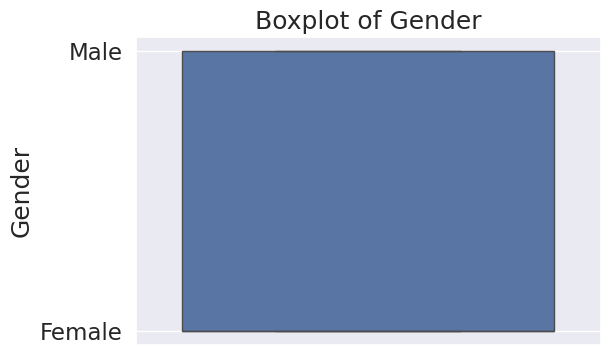

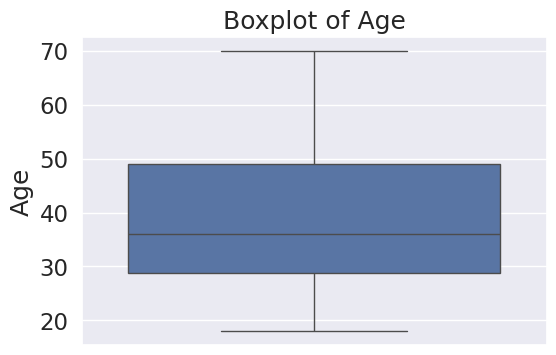

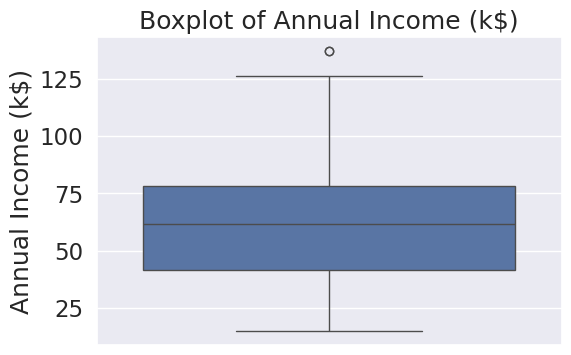

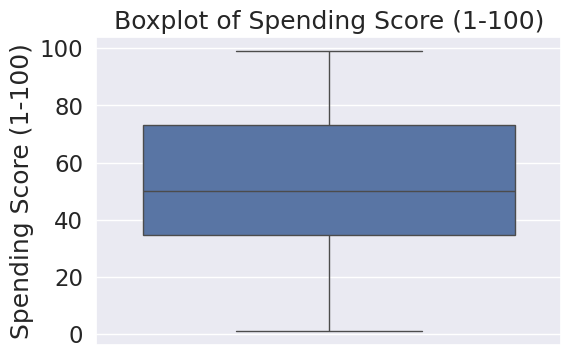

In [117]:
for col in df.columns:
  plt.figure(figsize=(6, 4))
  sns.boxplot(df[col])
  plt.title(f'Boxplot of {col}')
  plt.show()

In [118]:
Q1 = df['Annual Income (k$)'].quantile(0.25)
Q3 = df['Annual Income (k$)'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
df_cleaned = df[(df['Annual Income (k$)'] >= lower_bound) &
                 (df['Annual Income (k$)'] <= upper_bound)]

Cleaned Dataset

In [119]:
df_cleaned

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40
...,...,...,...,...
193,Female,38,113,91
194,Female,47,120,16
195,Female,35,120,79
196,Female,45,126,28


#4. Exploratory Data Analysis (EDA)


##Gender Data Visualization

In [120]:
df_cleaned['Gender'].unique()

array(['Male', 'Female'], dtype=object)

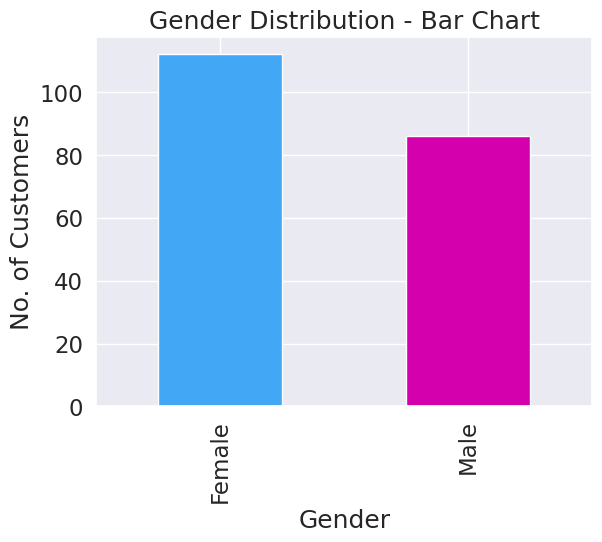

In [121]:
df_cleaned['Gender'].value_counts().plot(kind='bar', color=['#42a7f5', '#d400ad'])
plt.title('Gender Distribution - Bar Chart')
plt.ylabel('No. of Customers')
plt.show()

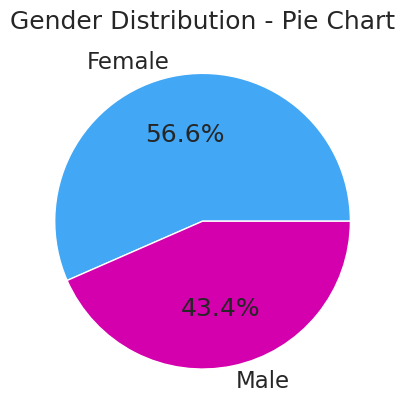

In [122]:
df_cleaned['Gender'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=['#42a7f5', '#d400ad'])
plt.title('Gender Distribution - Pie Chart')
plt.ylabel('')  # Removing Y-axis label for cleaner look
plt.show()

##Age Data Visualization

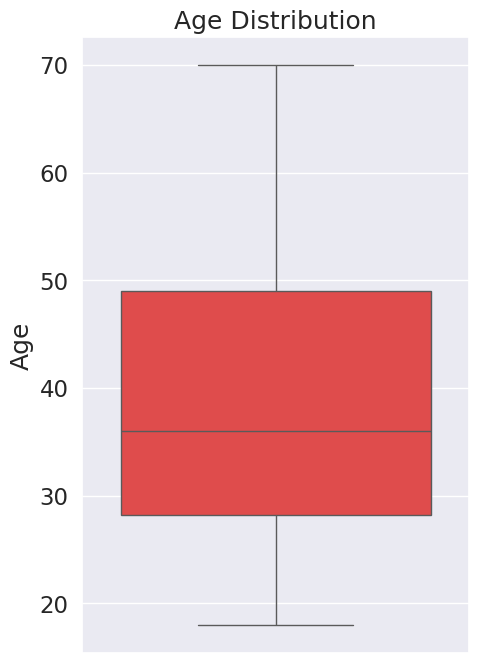

In [123]:
plt.figure(figsize=(5, 8))
sns.boxplot(y=df_cleaned['Age'], color='#f73434')
plt.title('Age Distribution')
plt.ylabel('Age')
plt.show()


<ipython-input-124-78ebabda64aa>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Age', data=df_cleaned, palette='viridis')


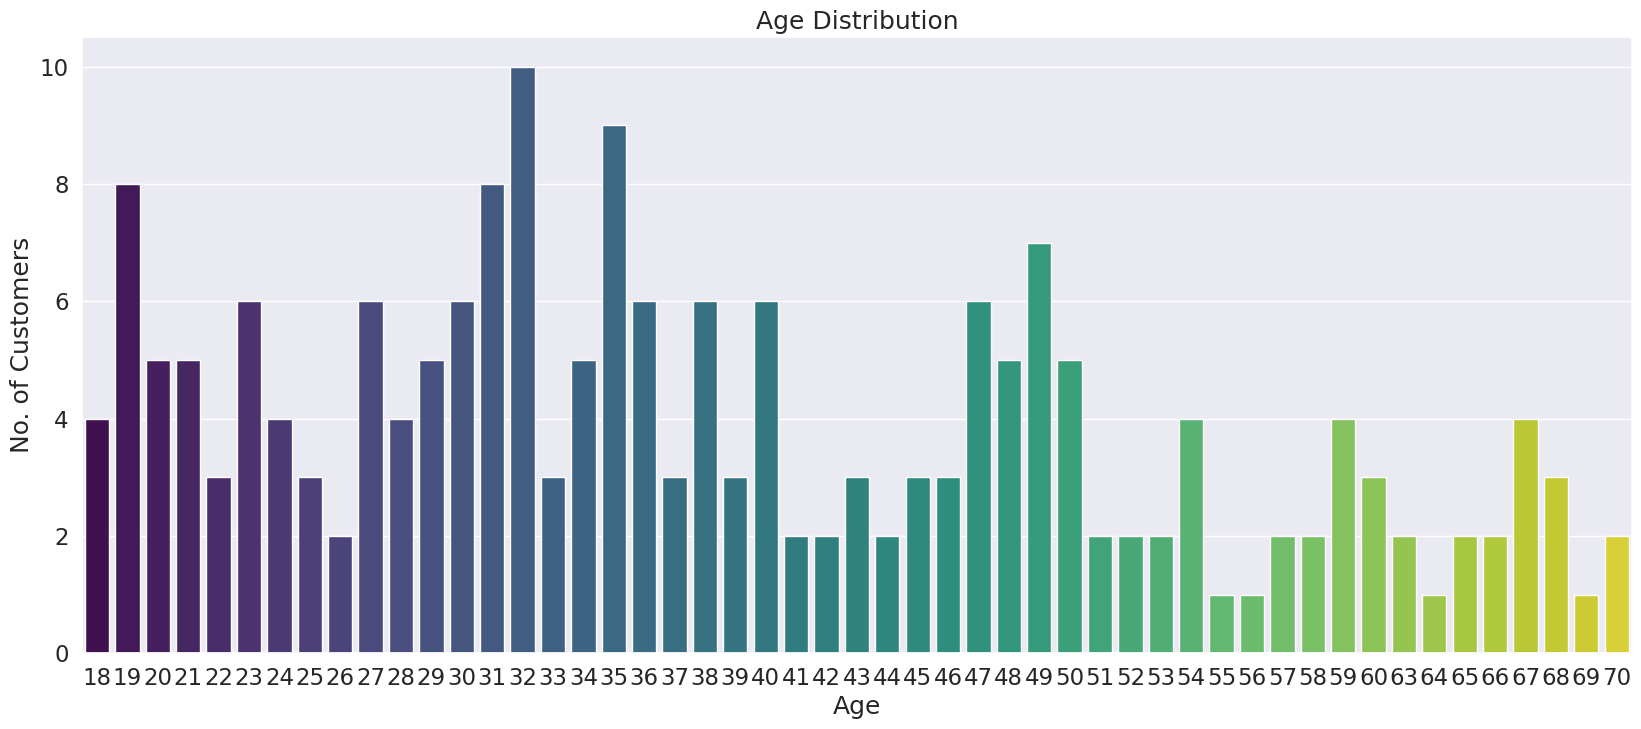

In [124]:
plt.figure(figsize=(20, 8))
sns.countplot(x='Age', data=df_cleaned, palette='viridis')
plt.title('Age Distribution')
plt.ylabel('No. of Customers')
plt.show()



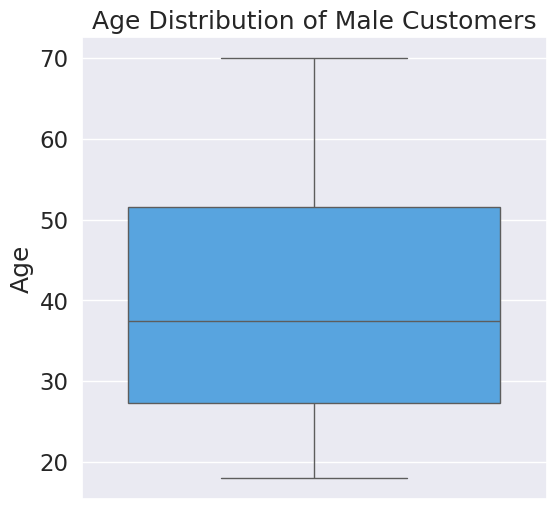

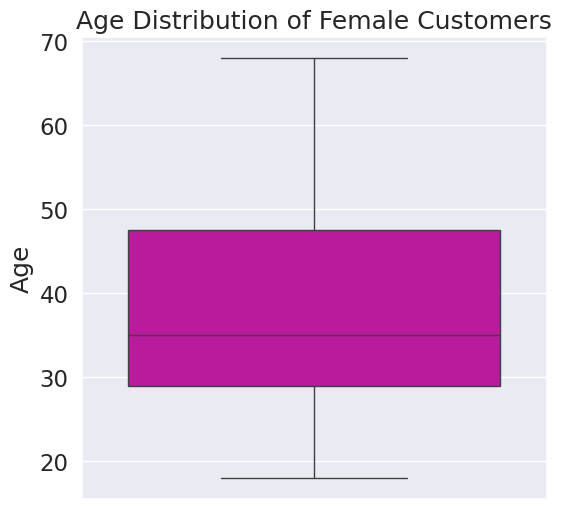

In [125]:
plt.figure(figsize=(6, 6))

# Male Customers
sns.boxplot(y='Age', data=df_cleaned[df_cleaned['Gender'] == 'Male'], color="#42a7f5")
plt.title('Age Distribution of Male Customers')
plt.ylabel('Age')
plt.show()

# Female Customers
plt.figure(figsize=(6, 6))
sns.boxplot(y='Age', data=df_cleaned[df_cleaned['Gender'] == 'Female'], color="#d400ad")
plt.title('Age Distribution of Female Customers')
plt.ylabel('Age')
plt.show()


<ipython-input-126-859e5d716376>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Age', data=df_cleaned[df_cleaned['Gender'] == 'Male'], palette='viridis')


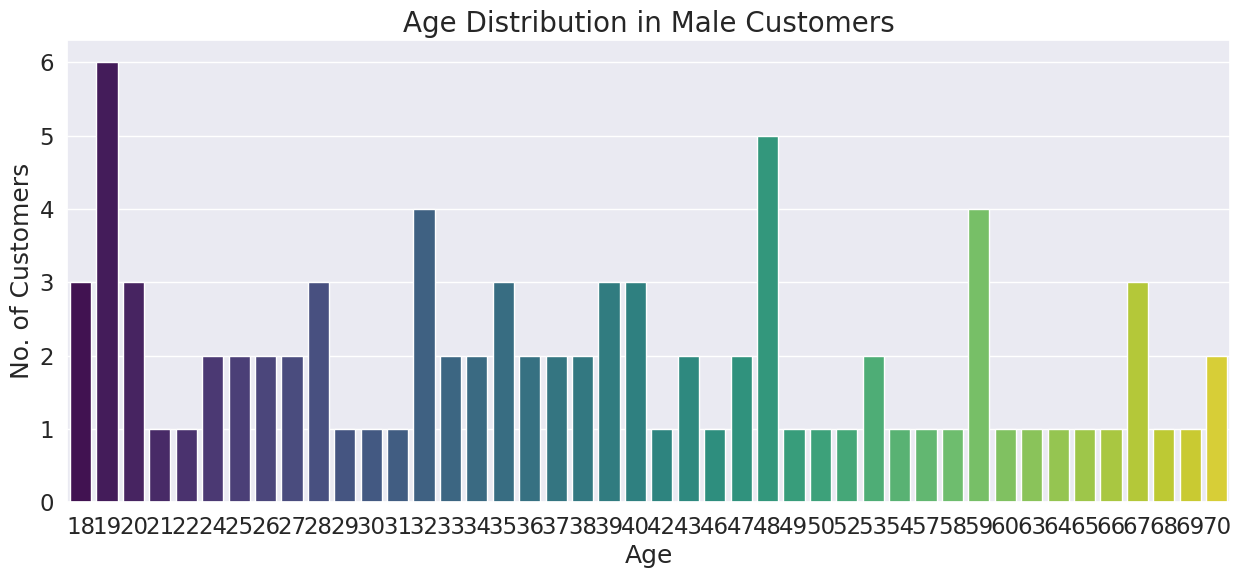

In [126]:
plt.figure(figsize=(15, 6))
sns.countplot(x='Age', data=df_cleaned[df_cleaned['Gender'] == 'Male'], palette='viridis')

plt.title('Age Distribution in Male Customers', fontsize=20)
plt.ylabel('No. of Customers')
plt.show()


<ipython-input-127-d3756d3cf6dc>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Age', data=df_cleaned[df_cleaned['Gender'] == 'Female'], palette='mako')


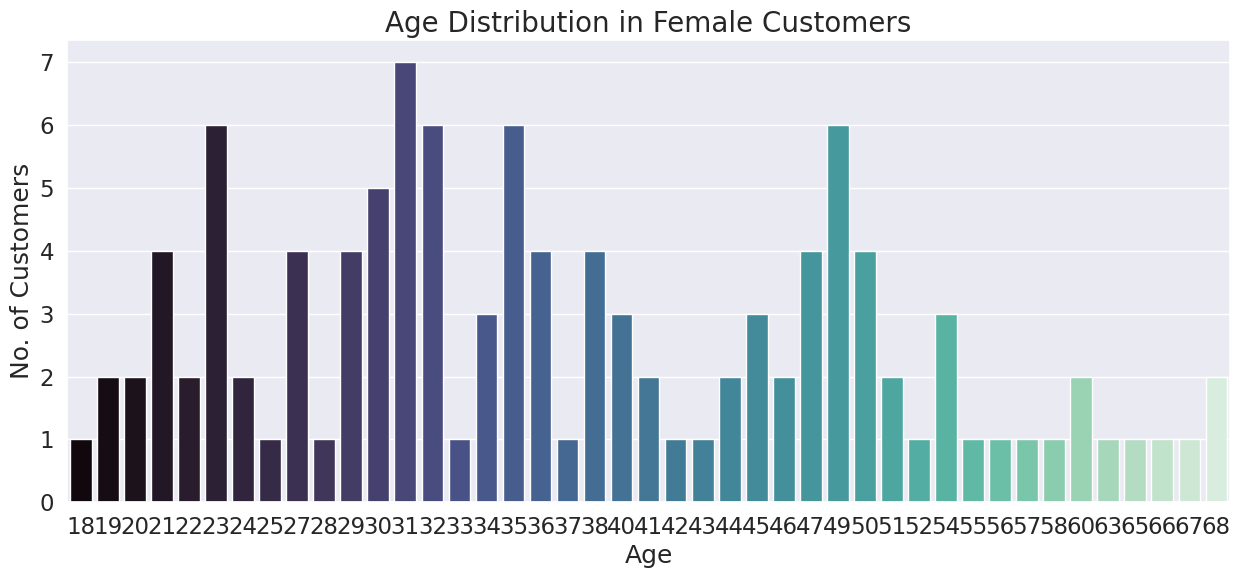

In [127]:
plt.figure(figsize=(15, 6))
sns.countplot(x='Age', data=df_cleaned[df_cleaned['Gender'] == 'Female'], palette='mako')

plt.title('Age Distribution in Female Customers', fontsize=20)
plt.ylabel('No. of Customers')
plt.show()


##Analyzing Annual Income data

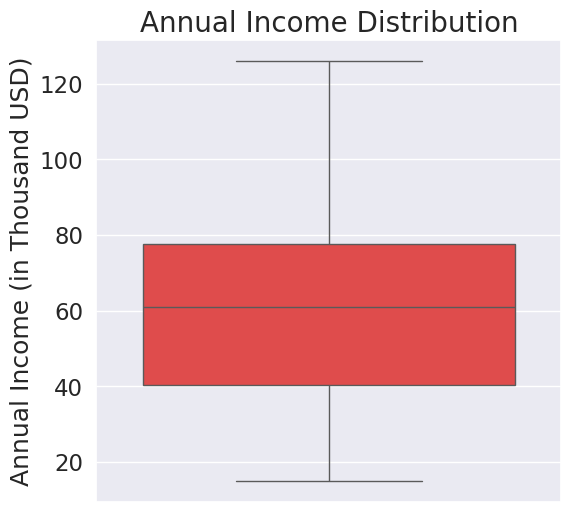

In [128]:
plt.figure(figsize=(6, 6))
sns.boxplot(y=df_cleaned["Annual Income (k$)"], color="#f73434")

plt.title('Annual Income Distribution', fontsize=20)
plt.ylabel('Annual Income (in Thousand USD)')
plt.show()



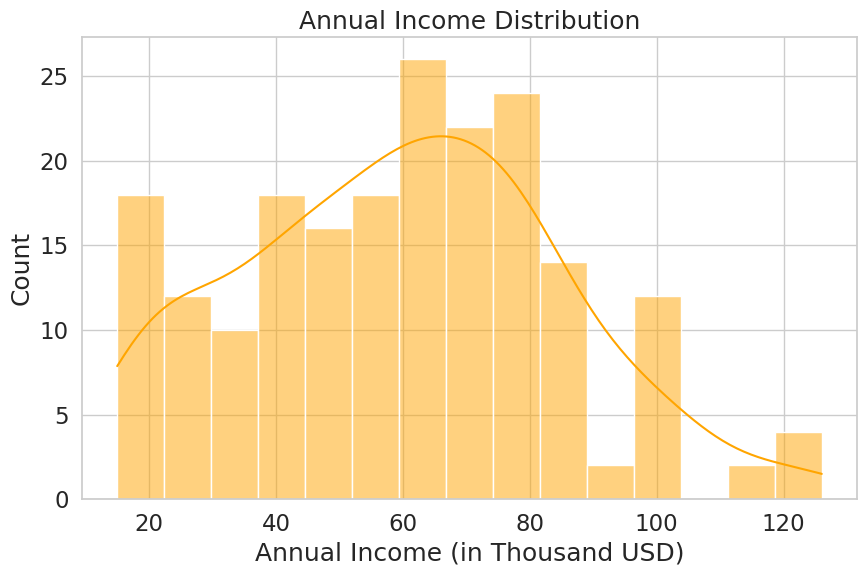

In [129]:
plt.figure(figsize=(10, 6))
sns.set_style('whitegrid')
sns.histplot(df_cleaned['Annual Income (k$)'], bins=15, color='orange', kde=True)

plt.title('Annual Income Distribution', fontsize=18)
plt.xlabel('Annual Income (in Thousand USD)')
plt.ylabel('Count')
plt.show()


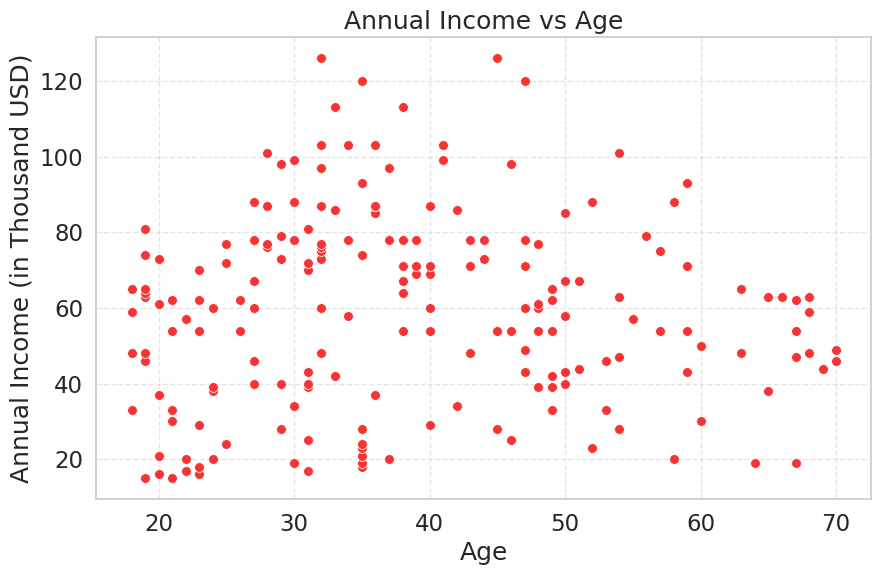

In [130]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_cleaned, x='Age', y='Annual Income (k$)', color='#f73434', s=50)

plt.title('Annual Income vs Age', fontsize=18)
plt.xlabel('Age')
plt.ylabel('Annual Income (in Thousand USD)')
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()



<ipython-input-131-f2123226ba5c>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_cleaned, x='Gender', y='Annual Income (k$)', palette='seismic')


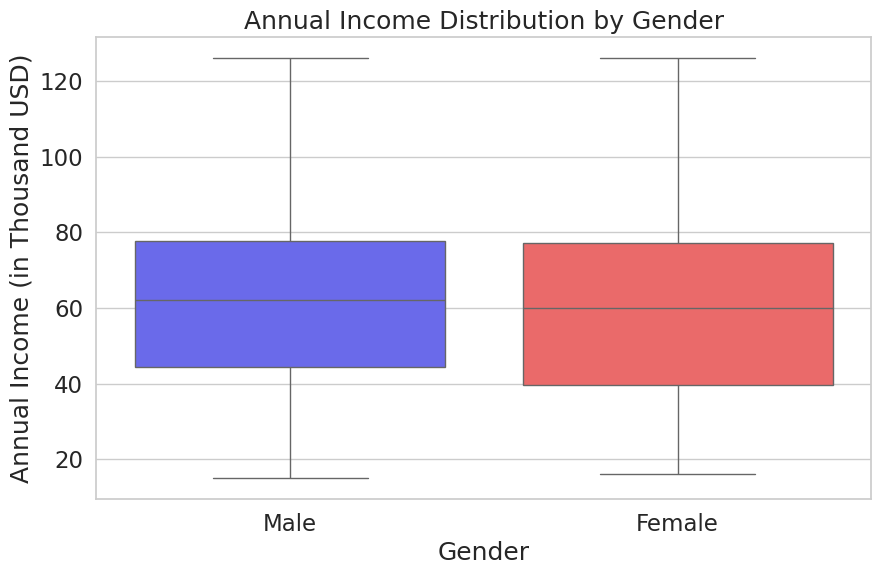

In [131]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_cleaned, x='Gender', y='Annual Income (k$)', palette='seismic')

plt.title('Annual Income Distribution by Gender', fontsize=18)
plt.xlabel('Gender')
plt.ylabel('Annual Income (in Thousand USD)')
plt.show()


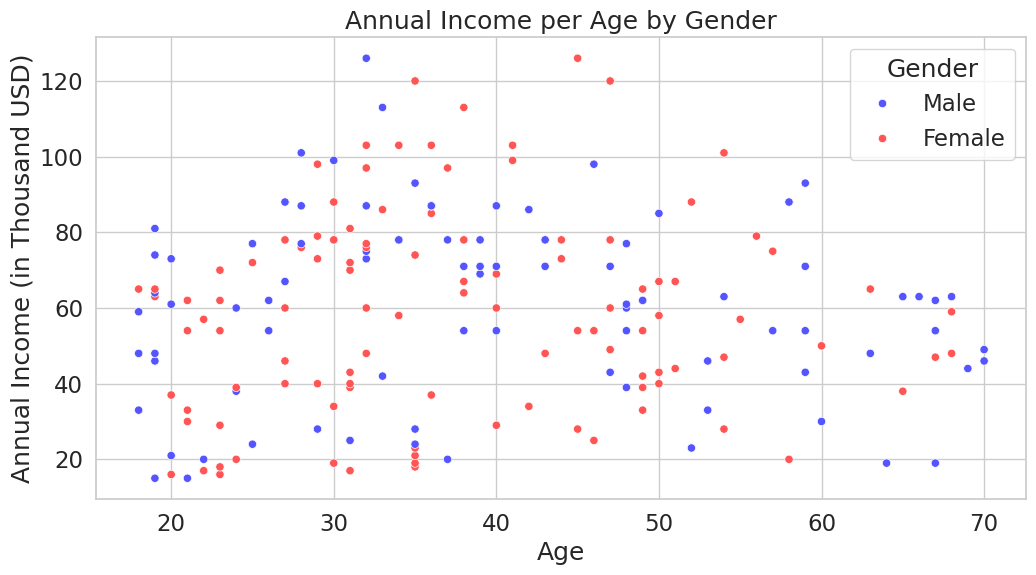

In [132]:
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df_cleaned, x='Age', y='Annual Income (k$)', hue='Gender', palette='seismic')

plt.title('Annual Income per Age by Gender', fontsize=18)
plt.xlabel('Age')
plt.ylabel('Annual Income (in Thousand USD)')
plt.legend(title='Gender')
plt.show()


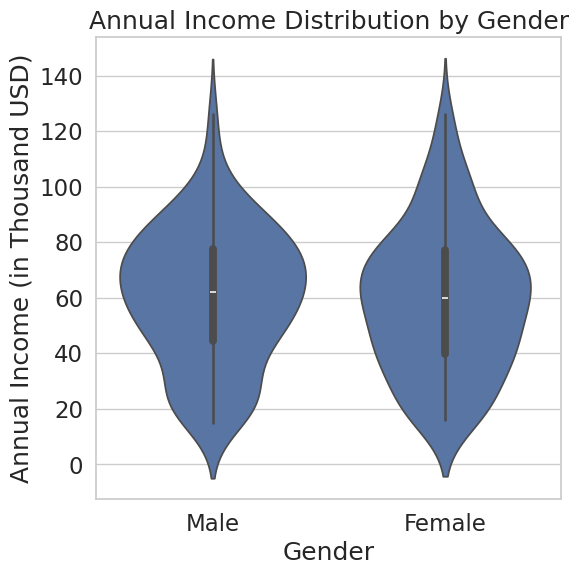

In [133]:
plt.figure(figsize=(6, 6))
sns.violinplot(data=df_cleaned, x='Gender', y='Annual Income (k$)')

plt.title('Annual Income Distribution by Gender', fontsize=18)
plt.xlabel('Gender')
plt.ylabel('Annual Income (in Thousand USD)')
plt.show()


##Analyzing Spending Score data

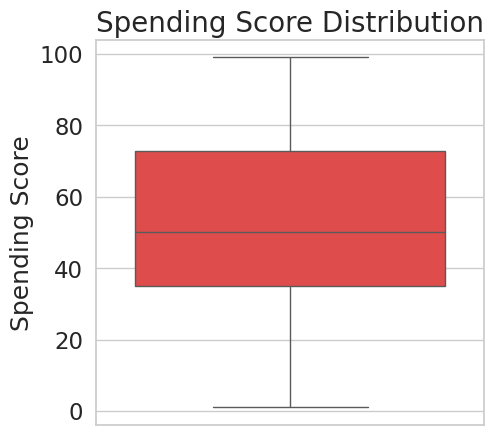

In [134]:
plt.figure(figsize=(5, 5))
sns.boxplot(y='Spending Score (1-100)', data=df_cleaned, color='#f73434')

plt.title('Spending Score Distribution', fontsize=20)
plt.ylabel('Spending Score')
plt.show()



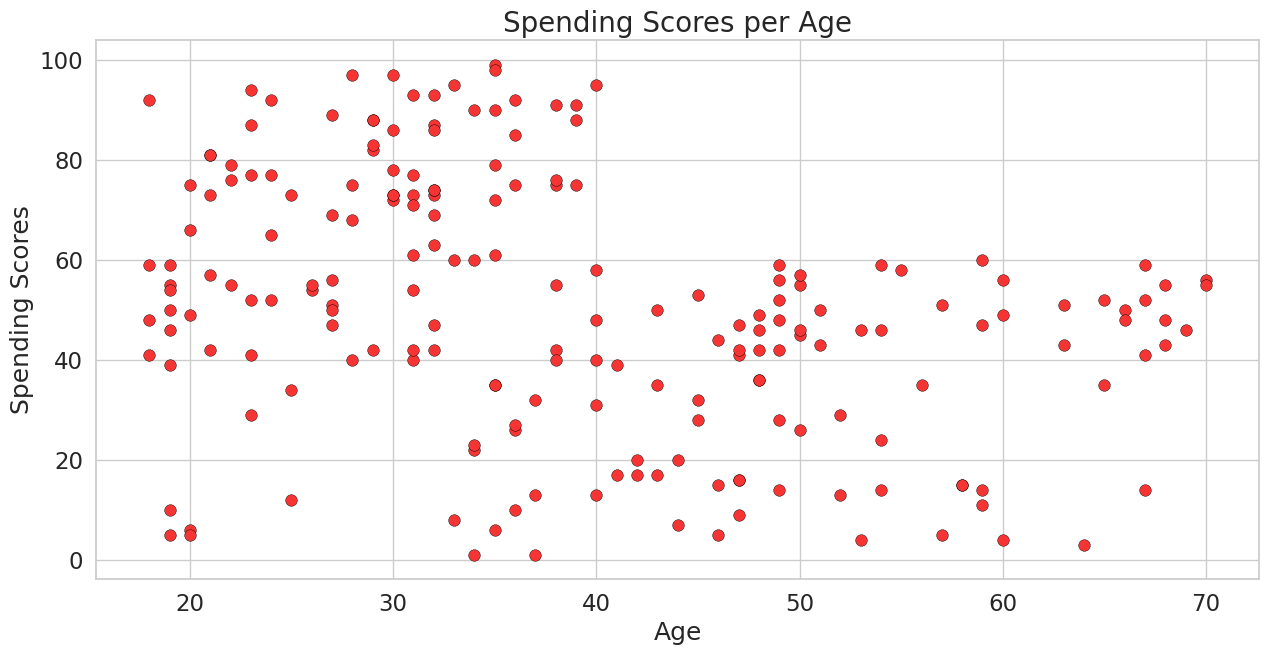

In [135]:
plt.figure(figsize=(15, 7))
sns.scatterplot(
    data=df_cleaned,
    x='Age',
    y='Spending Score (1-100)',
    color='#f73434',
    s=70,
    edgecolor='black',
    linewidth=0.3
)

plt.title('Spending Scores per Age', fontsize=20)
plt.ylabel('Spending Scores')
plt.show()


<ipython-input-136-fa3886dd195d>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


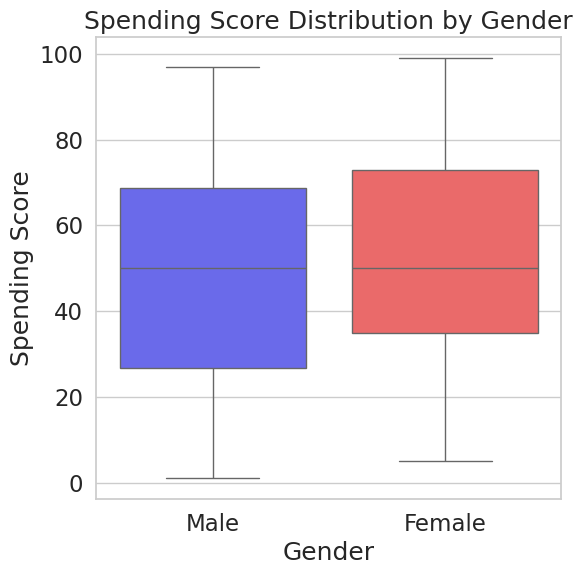

In [136]:
plt.figure(figsize=(6, 6))
sns.boxplot(
    data=df_cleaned,
    x='Gender',
    y='Spending Score (1-100)',
    palette='seismic'
)

plt.title('Spending Score Distribution by Gender', fontsize=18)
plt.ylabel('Spending Score')
plt.show()



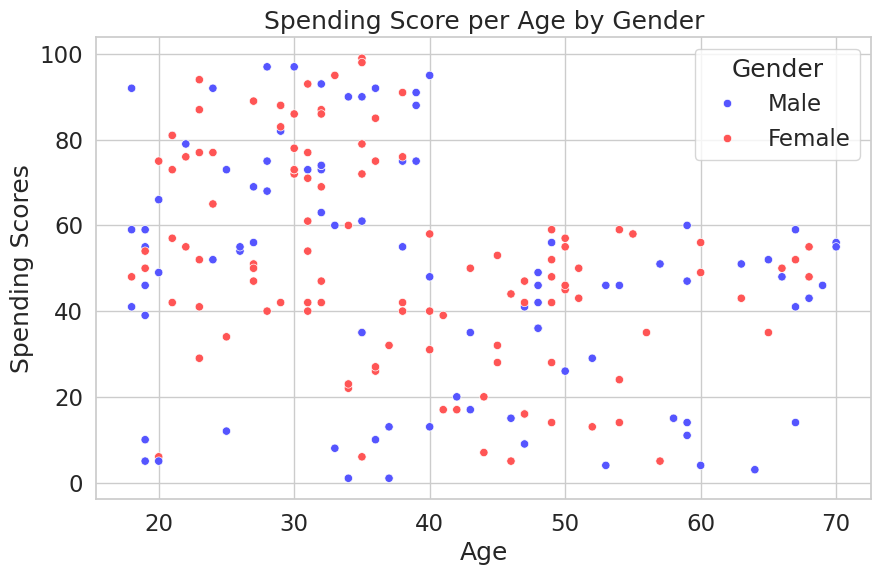

In [137]:
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=df_cleaned,
    x='Age',
    y='Spending Score (1-100)',
    hue='Gender',
    palette='seismic'
)

plt.title('Spending Score per Age by Gender', fontsize=18)
plt.ylabel('Spending Scores')
plt.show()


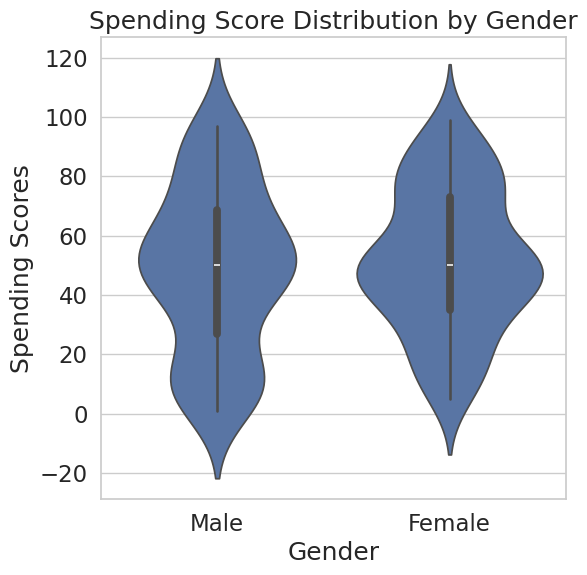

In [138]:
plt.figure(figsize=(6, 6))
sns.violinplot(data=df_cleaned, x='Gender', y='Spending Score (1-100)')

plt.title('Spending Score Distribution by Gender', fontsize=18)
plt.ylabel('Spending Scores')
plt.show()



In [139]:
clustering_data = df_cleaned.iloc[:, [2, 3]]
clustering_data.head()


,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


##Encoding gender

Encoding categorical data into a numerical format. Machine learning models generally work better with numerical data rather than text-based (categorical) data.

In [140]:
le = LabelEncoder()
df_cleaned['Gender'] = le.fit_transform(df_cleaned['Gender'])

<ipython-input-140-85027dde2af6>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['Gender'] = le.fit_transform(df_cleaned['Gender'])


##Correlation

In [141]:
corr = df_cleaned.corr()
corr

,Gender,Age,Annual Income (k$),Spending Score (1-100)
Gender,1.000000,0.067835,0.024384,-0.059092
Age,0.067835,1.000000,0.004406,-0.329421
Annual Income (k$),0.024384,0.004406,1.000000,0.010080
Spending Score (1-100),-0.059092,-0.329421,0.010080,1.000000


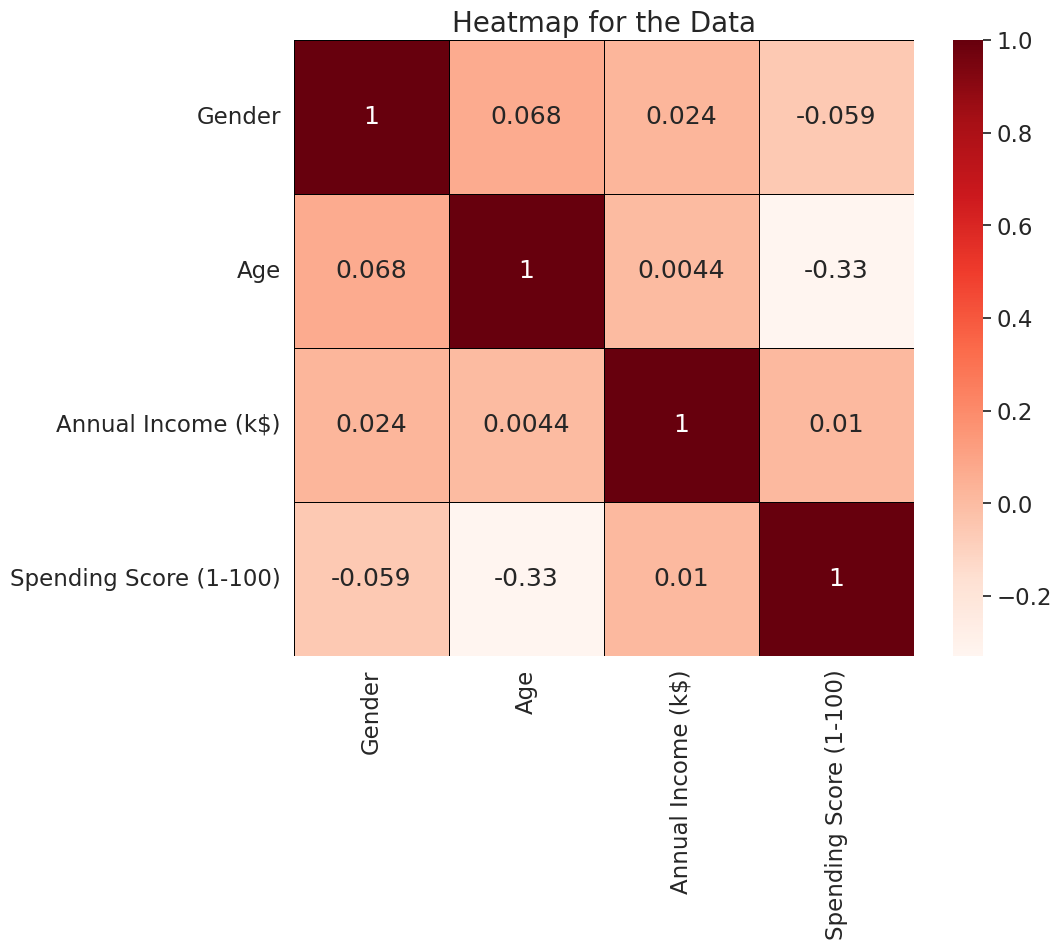

In [142]:
fig, ax = plt.subplots(figsize=(10,8))
sns.set(font_scale=1.5)
ax = sns.heatmap(corr, cmap = 'Reds', annot = True, linewidths=0.5, linecolor='black')
plt.title('Heatmap for the Data', fontsize = 20)
plt.show()

1. No Strong Correlations Found: None of the features have a correlation greater than 0.7 or less than -0.7, which indicates there are no strongly correlated pairs in the dataset.
2. Age vs Spending Score (-0.33): There’s a moderate negative correlation, suggesting that older customers tend to have lower spending scores.
3. Annual Income vs Spending Score (0.01): This is negligibly positive, meaning there’s almost no linear relationship between income and spending score.
4. Gender Correlation: Gender shows very weak correlations with all other features, meaning it has minimal influence on the numerical features in this dataset.

#Model - KMeans

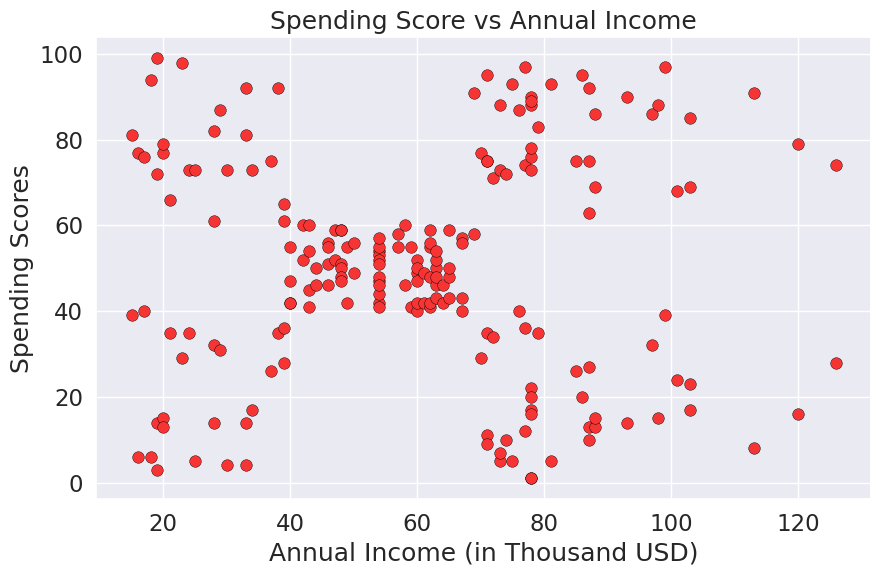

In [143]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=clustering_data,
                x='Annual Income (k$)',
                y='Spending Score (1-100)',
                color='#f73434',
                s=70,
                edgecolor='black',
                linewidth=0.3)

plt.title('Spending Score vs Annual Income', fontsize=18)
plt.xlabel('Annual Income (in Thousand USD)')
plt.ylabel('Spending Scores')
plt.show()




We will use Spending Score vs Annual Income for clustering.

##Hopkins score

Calculating Hopkins score to know whether the data is good for clustering or not.

In [144]:
def hopkins(X):
    d = X.shape[1]
    n = len(X)
    m = int(0.1 * n)
    nbrs = NearestNeighbors(n_neighbors=1).fit(X.values)

    rand_X = sample(range(0, n, 1), m)

    ujd = []
    wjd = []
    for j in range(0, m):
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1, -1), 2, return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1, -1), 2, return_distance=True)
        wjd.append(w_dist[0][1])

    HS = sum(ujd) / (sum(ujd) + sum(wjd))
    if isnan(HS):
        print(ujd, wjd)
        HS = 0

    return HS

In [145]:
Hopkins_score=round(hopkins(df_cleaned),2)

In [146]:
print("{} is a good Hopkins score for Clustering.".format(Hopkins_score))

0.7 is a good Hopkins score for Clustering.


##Feature Scaling

Scaling is a crucial preprocessing step in machine learning that ensures all features are on a similar scale. This improves model performance, convergence speed, and overall accuracy.

In [147]:
scaler = StandardScaler()
df_cleaned.loc[:, ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']] = scaler.fit_transform(
    df_cleaned[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']]
)

<ipython-input-147-898f575367b9>:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[-1.42541358 -1.2823665  -1.35389004 -1.13931942 -0.5671311  -1.21084296
 -0.28103694 -1.13931942  1.79314572 -0.63865464  2.00771635 -0.28103694
  1.36400448 -1.06779588 -0.13798986 -1.21084296 -0.28103694 -1.35389004
  0.93486324 -0.28103694 -0.28103694 -0.99627234  0.505722   -0.5671311
  1.07791032 -0.71017818  0.43419846 -0.28103694  0.07658076 -1.13931942
  1.50705156 -1.2823665   1.00638678 -1.49693712  0.72029262 -1.2823665
  0.21962784 -0.63865464 -0.2095134  -1.35389004  1.86466927 -1.06779588
  0.64876908 -0.5671311   0.72029262 -1.06779588  0.79181616 -0.85322526
 -0.71017818 -0.5671311   0.72029262 -0.42408402 -0.5671311   1.43552802
  0.79181616  0.57724554  0.8633397   2.15076343 -0.85322526  1.00638678
  2.22228697 -1.42541358  2.00771635  1.07791032  1.72162218 -1.49693712
  0.29115138  2.07923989 -1.42541358 -0.49560

##Determining No. of Clusters Required

1. Elbow Method


The Elbow Method is a technique used to determine the optimal number of clusters in K-Means Clustering. It evaluates the Within-Cluster Sum of Squares (WCSS), which measures the total distance between data points and their assigned cluster centroids.

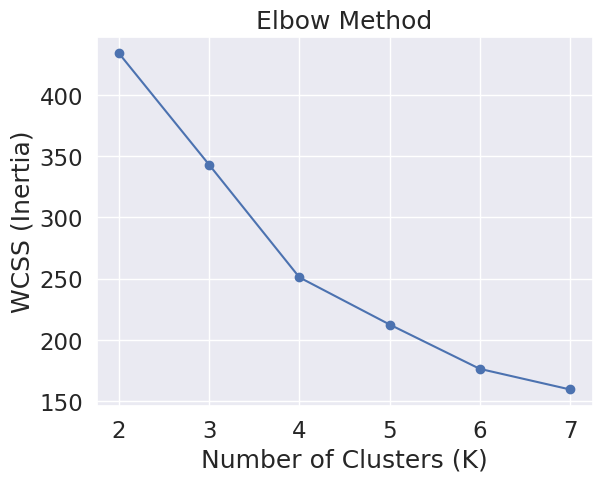

In [148]:
clusters = range(2, 8)
wcss = []

for i in clusters:
    km = KMeans(n_clusters=i, random_state=50)
    km.fit(df_cleaned)
    wcss.append(km.inertia_)

plt.plot(clusters, wcss, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('WCSS (Inertia)')
plt.grid(True)
plt.show()

It is clear, that the optimal number of clusters for our data are 5, as the slope of the curve is not steep enough after it. When we observe this curve, we see that last elbow comes at k = 5, it would be difficult to visualize the elbow if we choose the higher range.

2. Silhouette Method


The Silhouette Method evaluates cluster quality based on how well data points fit within their clusters versus how far they are from other clusters.

In [149]:
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]

for num_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=num_clusters, init='k-means++',random_state= 15)
    kmeans.fit(df_cleaned)
    cluster_labels = kmeans.labels_
    silhouette_avg = silhouette_score(df_cleaned, cluster_labels)
    print("For n_clusters={0}, the silhouette score is {1}".format(num_clusters, silhouette_avg))

For n_clusters=2, the silhouette score is 0.22382625950686344
For n_clusters=3, the silhouette score is 0.2796445201297022
For n_clusters=4, the silhouette score is 0.30613882390348124
For n_clusters=5, the silhouette score is 0.3602087931270939
For n_clusters=6, the silhouette score is 0.3365938928705777
For n_clusters=7, the silhouette score is 0.35988026816532825
For n_clusters=8, the silhouette score is 0.3427335065487748


The optimal number of clusters is 5, as it achieves the highest silhouette score of 0.3602, indicating the best cluster separation and cohesion.

##Creating Model

In [150]:
cluster = KMeans(n_clusters=5, init='k-means++', random_state=15)
cluster.fit(df_cleaned)

KMeans(n_clusters=5, random_state=15)

In [151]:
df_cleaned.loc[:, 'Cluster_Id'] = cluster.labels_
df_cleaned.head()

<ipython-input-151-83535c2b6eff>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned.loc[:, 'Cluster_Id'] = cluster.labels_


,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster_Id
0,1,-1.425414,-1.779171,-0.435989,3
1,1,-1.282367,-1.779171,1.199413,3
2,0,-1.353890,-1.739447,-1.720949,1
3,0,-1.139319,-1.739447,1.043661,3
4,0,-0.567131,-1.699723,-0.397051,1


In [152]:
df_cleaned.Cluster_Id.value_counts(ascending=True)

,count
Cluster_Id,
1,21
0,38
4,39
2,47
3,53


##Visualization of clusters

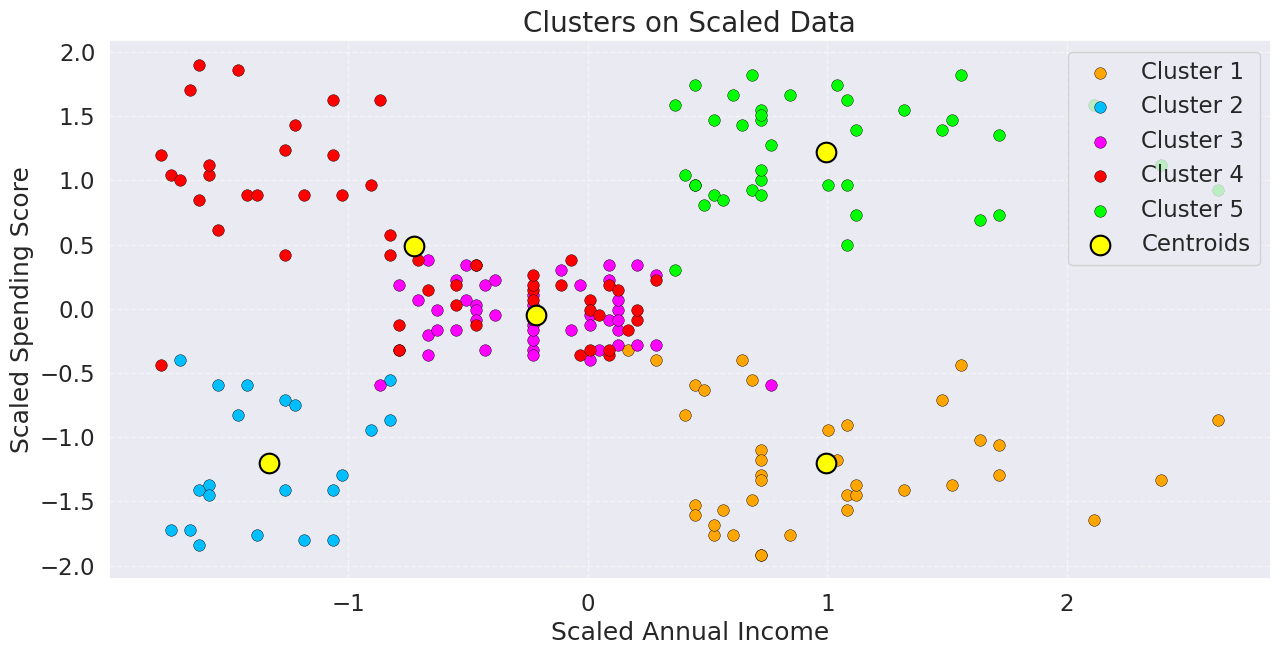

In [153]:
fig, ax = plt.subplots(figsize=(15, 7))
colors = ['orange', 'deepskyblue', 'magenta', 'red', 'lime']
labels = ['Cluster 1', 'Cluster 2', 'Cluster 3', 'Cluster 4', 'Cluster 5']

for i in range(5):
    sns.scatterplot(
        x=df_cleaned[df_cleaned['Cluster_Id'] == i]['Annual Income (k$)'],
        y=df_cleaned[df_cleaned['Cluster_Id'] == i]['Spending Score (1-100)'],
        s=70, edgecolor='black', linewidth=0.3, color=colors[i], label=labels[i], ax=ax
    )

sns.scatterplot(
    x=cluster.cluster_centers_[:, df_cleaned.columns.get_loc('Annual Income (k$)')],
    y=cluster.cluster_centers_[:, df_cleaned.columns.get_loc('Spending Score (1-100)')],
    s=200, color='yellow', marker='o', label='Centroids', edgecolor='black', linewidth=1.5, ax=ax
)

plt.legend(loc='upper right')
plt.xlabel('Scaled Annual Income')
plt.ylabel('Scaled Spending Score')
plt.title('Clusters on Scaled Data', fontsize=20)
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()


##Visualizing individual clusters

The following clusters are created by the model,

1. Cluster Orange
2. Cluster Blue
3. Cluster Pink
4. Cluster Red
5. Cluster Green

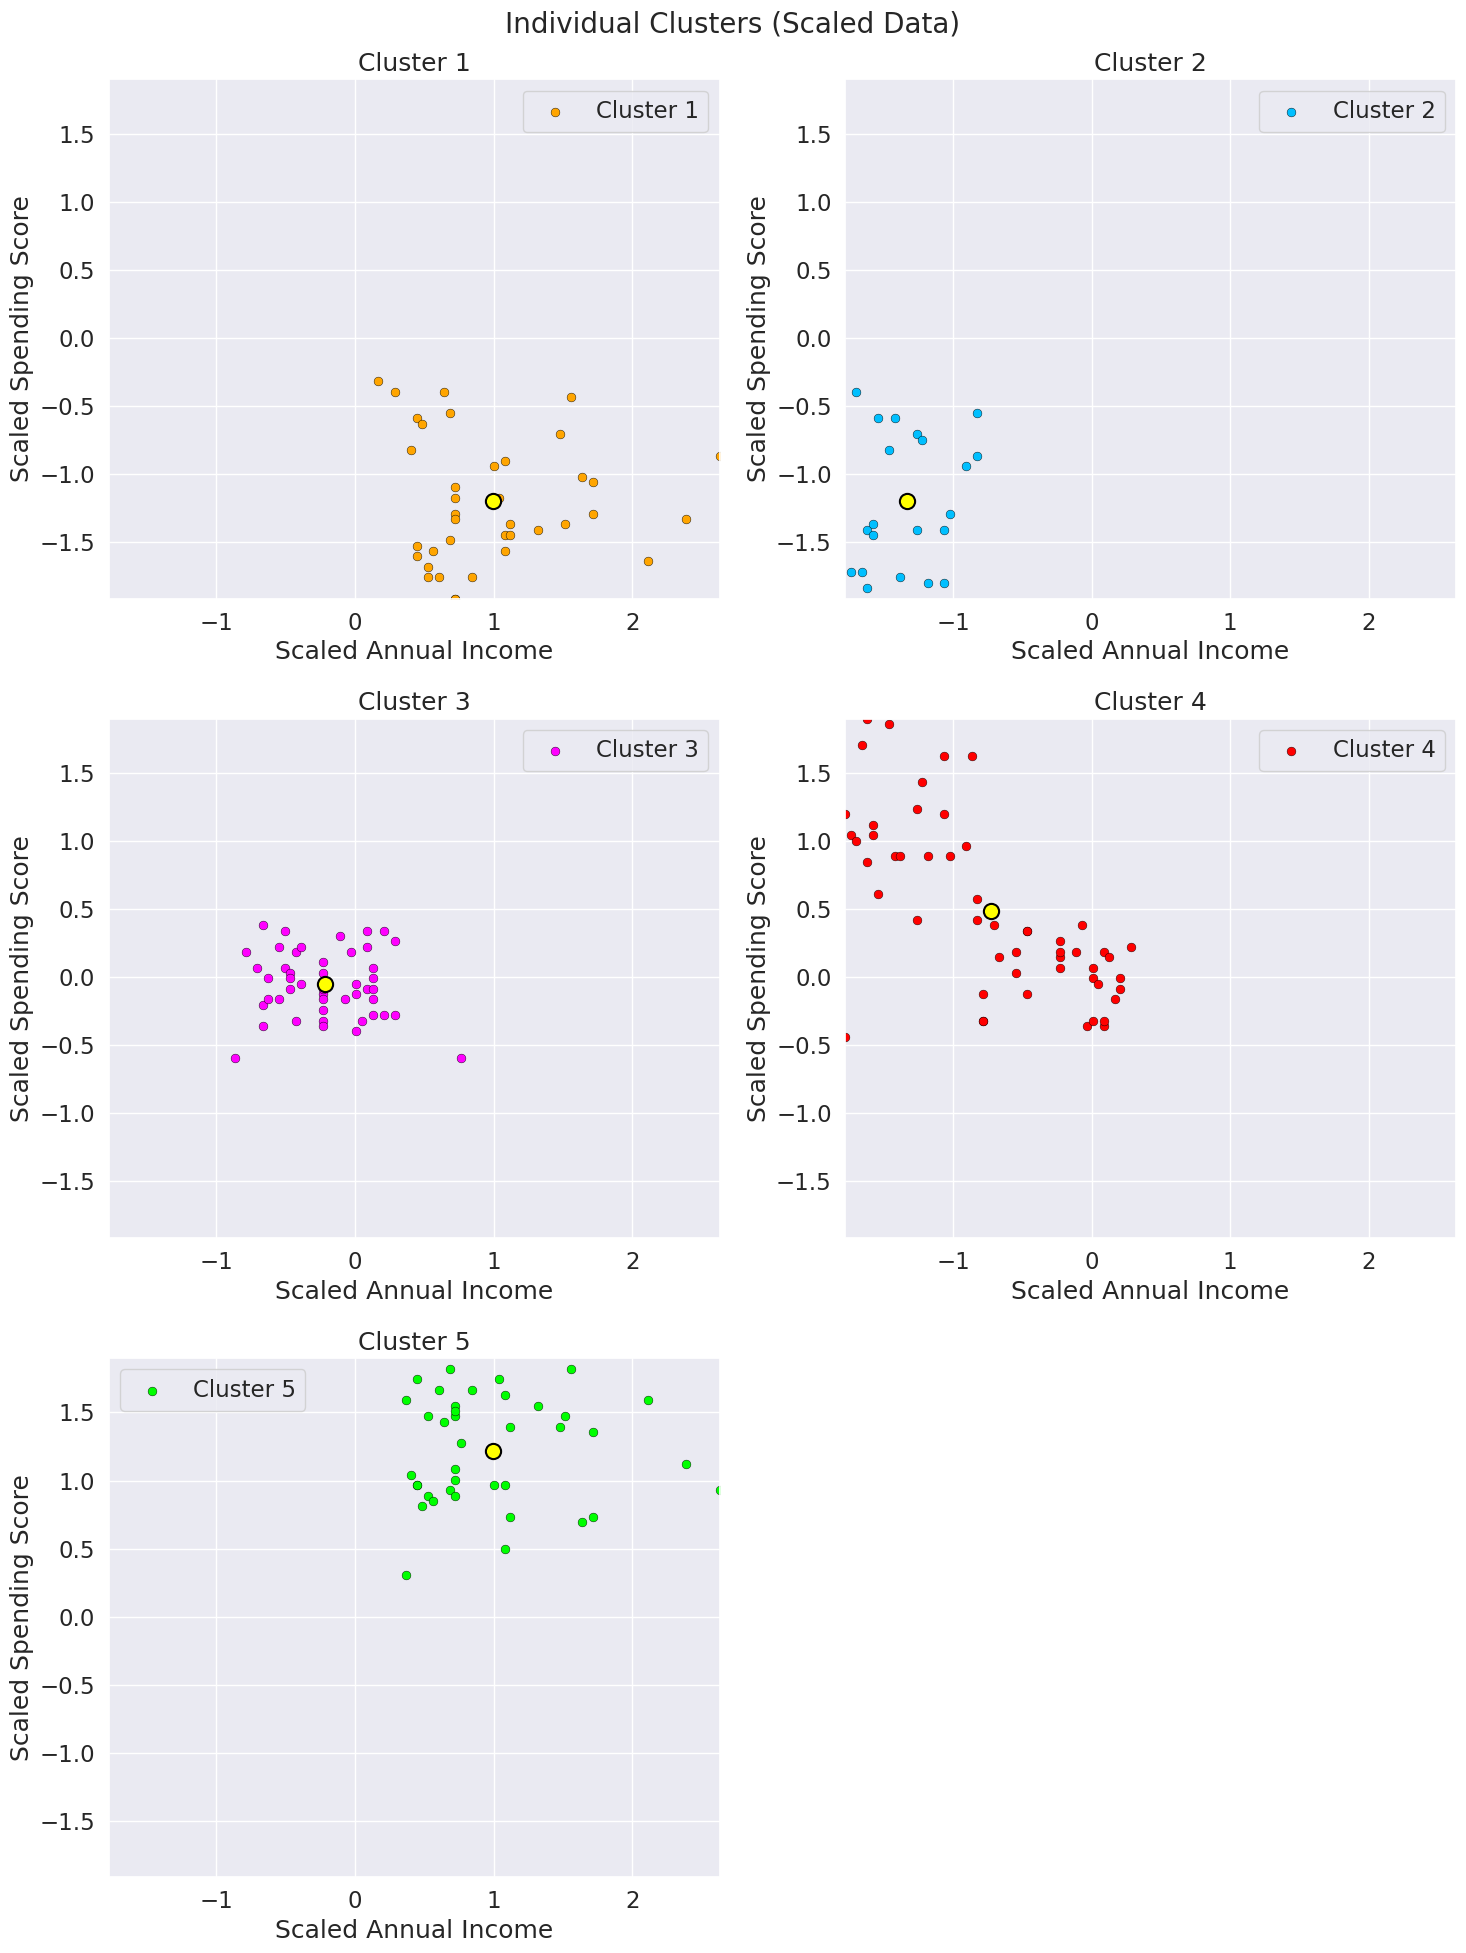

In [154]:
fig, ax = plt.subplots(nrows=3, ncols=2, figsize=(15, 20))

# Cluster colors
colors = ['orange', 'deepskyblue', 'magenta', 'red', 'lime']

# Individual Cluster Visualization
for i in range(5):
    row, col = divmod(i, 2)  # For proper subplot positioning

    sns.scatterplot(
        x=df_cleaned[df_cleaned['Cluster_Id'] == i]['Annual Income (k$)'],
        y=df_cleaned[df_cleaned['Cluster_Id'] == i]['Spending Score (1-100)'],
        s=40, edgecolor='black', linewidth=0.3, color=colors[i], ax=ax[row, col],
        label=f'Cluster {i + 1}'
    )

    sns.scatterplot(
        x=[cluster.cluster_centers_[i, df_cleaned.columns.get_loc('Annual Income (k$)')]],
        y=[cluster.cluster_centers_[i, df_cleaned.columns.get_loc('Spending Score (1-100)')]],
        s=120, color='yellow', marker='o', edgecolor='black', linewidth=1.5, ax=ax[row, col]
    )

    ax[row, col].set(
        xlim=(df_cleaned['Annual Income (k$)'].min(), df_cleaned['Annual Income (k$)'].max()),
        ylim=(df_cleaned['Spending Score (1-100)'].min(), df_cleaned['Spending Score (1-100)'].max()),
        xlabel='Scaled Annual Income', ylabel='Scaled Spending Score',
        title=f'Cluster {i + 1}'
    )

# Remove the empty subplot (last position in 3x2 layout)
fig.delaxes(ax[2, 1])

fig.suptitle('Individual Clusters (Scaled Data)', fontsize=20)
plt.tight_layout()
plt.show()


###1. Cluster 1 (Orange) - Balanced Customers

These customers have low annual income and low spending scores.
They are cautious spenders, likely prioritizing savings.
Not a prime target for marketing campaigns but may respond well to budget-friendly offers.
###2. Cluster 2 (Blue) - Pinch Penny Customers

Customers with low spending scores despite having moderate to high income.
They have spending potential but are conservative buyers.
These customers could be attracted through better promotions, improved services, or loyalty programs.
###3. Cluster 3 (Purple) - Normal Customers

Customers with average income and moderate spending scores.
They exhibit balanced spending behavior and may need targeted offers to boost spending.
Good potential for increasing sales through personalized marketing.
###4. Cluster 4 (Red) - Spenders

These customers have low to moderate income but high spending scores.
They tend to spend actively despite limited income.
Although not ideal long-term targets, retaining them through offers or rewards can be beneficial.
###5. Cluster 5 (Green) - Target Customers

This is the most valuable segment with high income and high spending scores.
They are frequent buyers and major revenue contributors.
Malls and businesses should prioritize this group with premium services, loyalty benefits, and exclusive deals.

#Applying PCA

PCA (Principal Component Analysis) is applied to the data to reduce its dimensionality while retaining the most significant information. In the case of the mall customer dataset, we have four features (like Age, Annual Income, etc.), which is causing the overlapping of pink and red clusters and make visualization challenging.

PCA reduces the data to 2D in this case making it easier to visualize customer segments and understand their distribution.It removes correlated features, reducing noise and enhancing the model's clarity. By transforming the data into its most meaningful components, PCA improves cluster separation and mitigates overlap issues.

In [155]:
from sklearn.decomposition import PCA

In [156]:
pca = PCA(n_components=2)
pca_data = pca.fit_transform(df_cleaned)
pca_df = pd.DataFrame(pca_data, columns=['PCA1', 'PCA2'])



In [157]:
kmeans = KMeans(n_clusters=5, random_state=42)
pca_df['Cluster_Id'] = kmeans.fit_predict(pca_df)

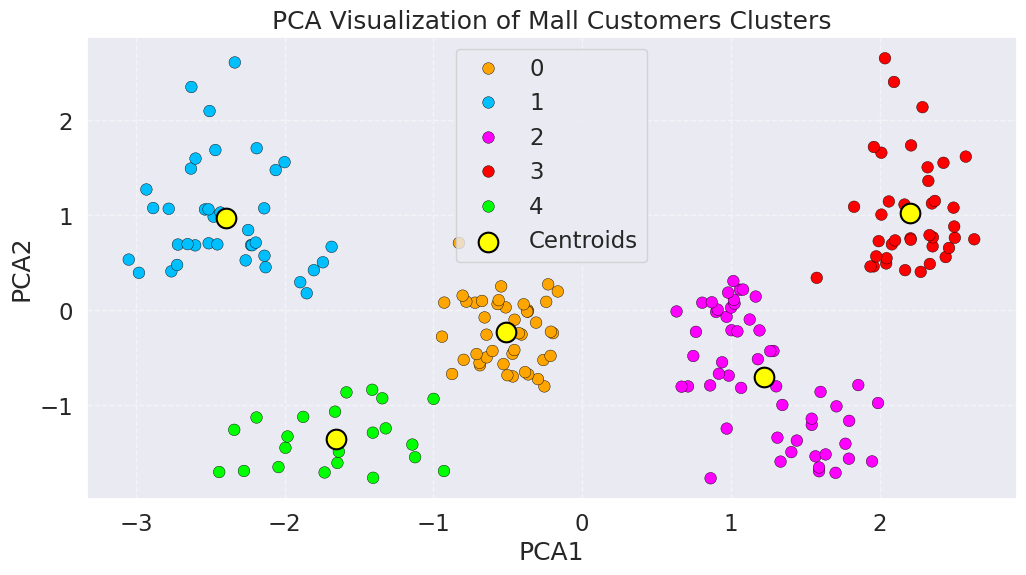

In [158]:
plt.figure(figsize=(12, 6))
sns.scatterplot(
    x='PCA1',
    y='PCA2',
    hue='Cluster_Id',
    palette=['orange', 'deepskyblue', 'magenta', 'red', 'lime'],
    data=pca_df,
    s=70, edgecolor='black', linewidth=0.3
)

centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1], s=200, c='yellow', marker='o', edgecolor='black', linewidth=1.5, label='Centroids')

plt.title('PCA Visualization of Mall Customers Clusters')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

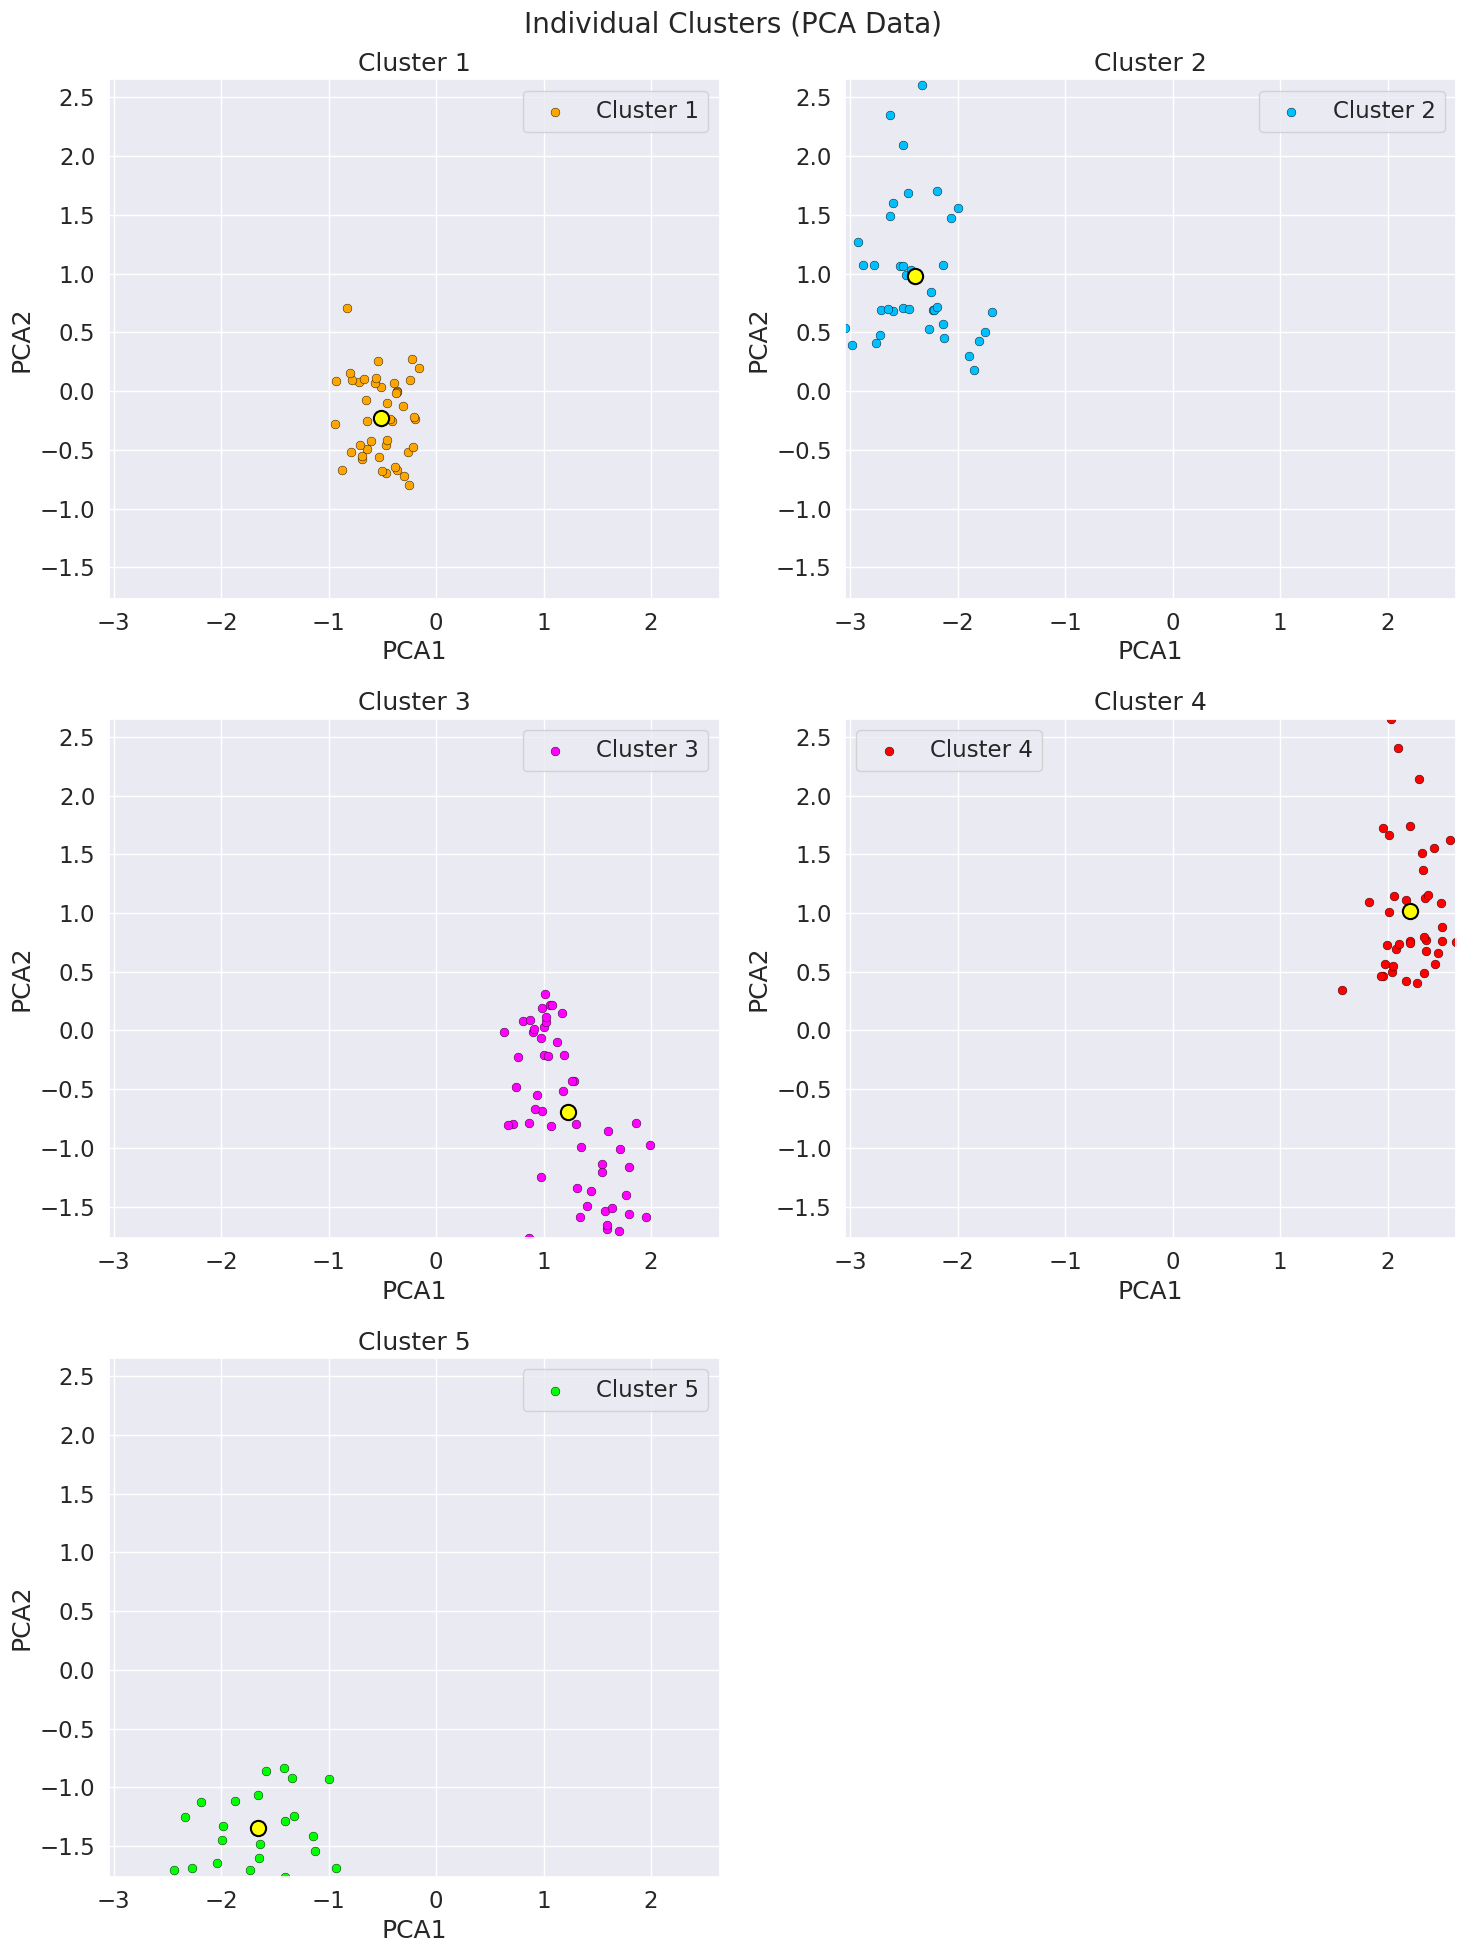

In [159]:
fig, ax = plt.subplots(nrows=3, ncols=2, figsize=(15, 20))

colors = ['orange', 'deepskyblue', 'magenta', 'red', 'lime']

for i in range(5):
    row, col = divmod(i, 2)

    sns.scatterplot(
        x=pca_df[pca_df['Cluster_Id'] == i]['PCA1'],
        y=pca_df[pca_df['Cluster_Id'] == i]['PCA2'],
        s=40, edgecolor='black', linewidth=0.3, color=colors[i], ax=ax[row, col],
        label=f'Cluster {i + 1}'
    )

    sns.scatterplot(
        x=[kmeans.cluster_centers_[i, 0]],
        y=[kmeans.cluster_centers_[i, 1]],
        s=120, color='yellow', marker='o', edgecolor='black', linewidth=1.5, ax=ax[row, col]
    )

    ax[row, col].set(
        xlim=(pca_df['PCA1'].min(), pca_df['PCA1'].max()),
        ylim=(pca_df['PCA2'].min(), pca_df['PCA2'].max()),
        xlabel='PCA1', ylabel='PCA2',
        title=f'Cluster {i + 1}'
    )
fig.delaxes(ax[2, 1])

fig.suptitle('Individual Clusters (PCA Data)', fontsize=20)
plt.tight_layout()
plt.show()